In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load data
data = pd.read_csv('transactions.csv')

# Preprocess data
data['block_timestamp'] = pd.to_datetime(data['block_timestamp']).astype(int) / 10**9
scaler = StandardScaler()
columns_to_scale = ['block_timestamp', 'nonce', 'receipt_conversion_gas_burnt', 'receipt_conversion_tokens_burnt']
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])

# Encode categorical features
le = LabelEncoder()
data['signer_account_id'] = le.fit_transform(data['signer_account_id'])
data['receiver_account_id'] = le.fit_transform(data['receiver_account_id'])

# Feature engineering
data['time_since_last_transaction'] = data['block_timestamp'].diff().fillna(0)
data['transaction_count'] = data.groupby('signer_account_id')['signer_account_id'].transform('count')

# Dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data[['block_timestamp', 'nonce', 'receipt_conversion_gas_burnt', 'receipt_conversion_tokens_burnt', 'time_since_last_transaction', 'transaction_count']])
principal_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

# Clustering
kmeans = KMeans(n_clusters=5)
data['cluster'] = kmeans.fit_predict(principal_df)

# Analyze clusters
print(data.groupby('cluster').mean())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         index_in_chunk  block_timestamp  signer_account_id     nonce  \
cluster                                                                 
0              0.993277        -0.029667        7116.142881  0.481741   
1              1.645390        -0.159201       10615.000000 -0.531336   
2              2.852227        -0.088503       10715.000000 -0.591646   
3              8.582806         0.499478       10538.000000  0.044846   
4              1.122203         0.031985        8220.146090 -1.008891   

         receiver_account_id  receipt_conversion_gas_burnt  \
cluster                                                      
0                6143.617236                     -0.013891   
1                4425.000481                     -0.111881   
2                5109.684444                      0.220904   
3                6965.000000                     -0.103735   
4                5338.997234                     -0.112096   

         receipt_conversion_tokens_burnt  time_since_

<ipython-input-3-1cc536aa056d>:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(data.groupby('cluster').mean())


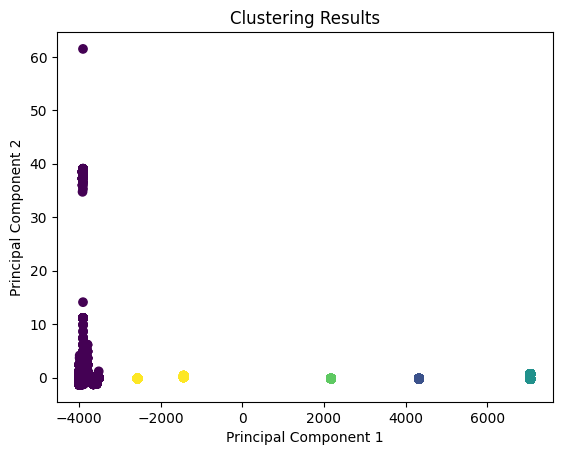

In [4]:
import matplotlib.pyplot as plt

# Plot the clusters
plt.scatter(
    principal_df['principal_component_1'],
    principal_df['principal_component_2'],
    c=data['cluster'],
    cmap='viridis'
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Results')
plt.show()


<ipython-input-5-c64fac43ab78>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


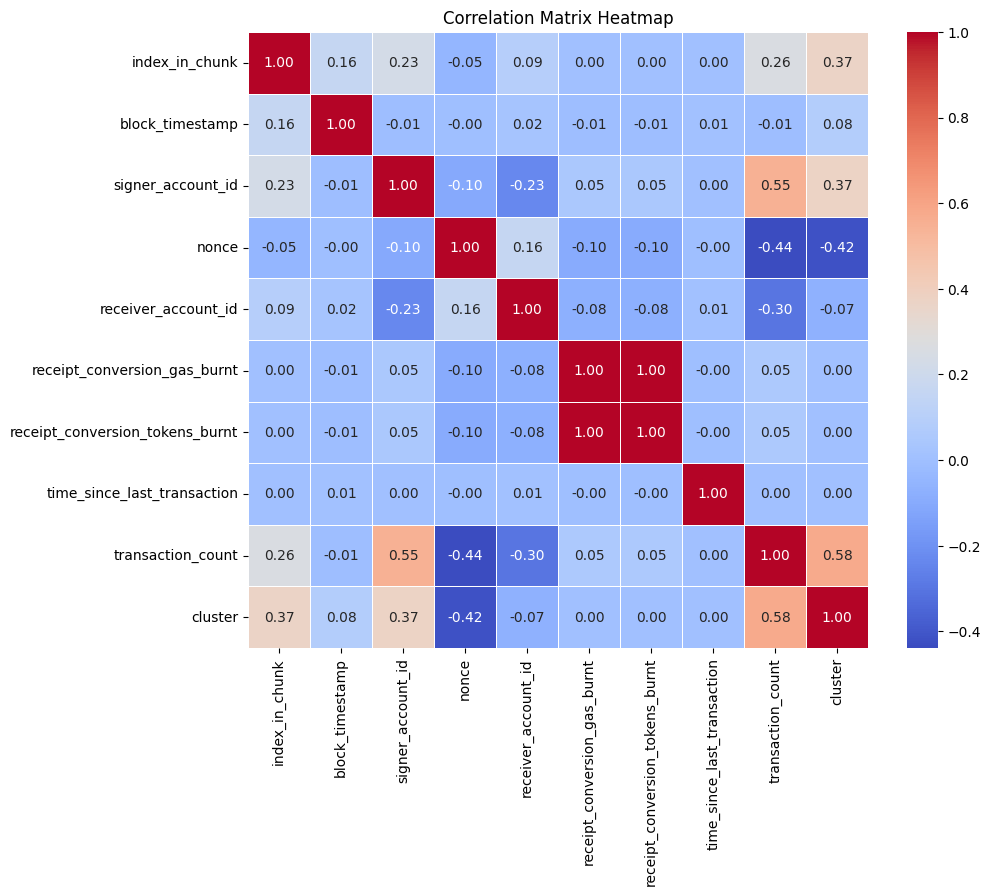

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = data.corr()

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


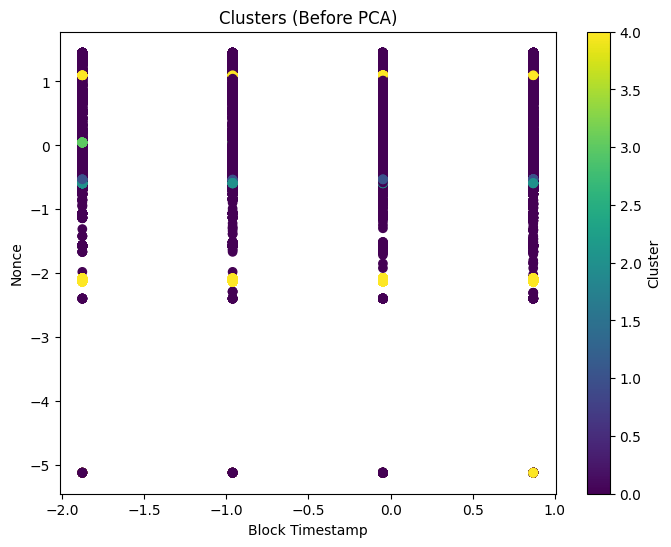

In [6]:
import matplotlib.pyplot as plt

# Plot scatter plot of two features before PCA
plt.figure(figsize=(8, 6))
plt.scatter(data['block_timestamp'], data['nonce'], c=data['cluster'], cmap='viridis')
plt.xlabel('Block Timestamp')
plt.ylabel('Nonce')
plt.title('Clusters (Before PCA)')
plt.colorbar(label='Cluster')
plt.show()


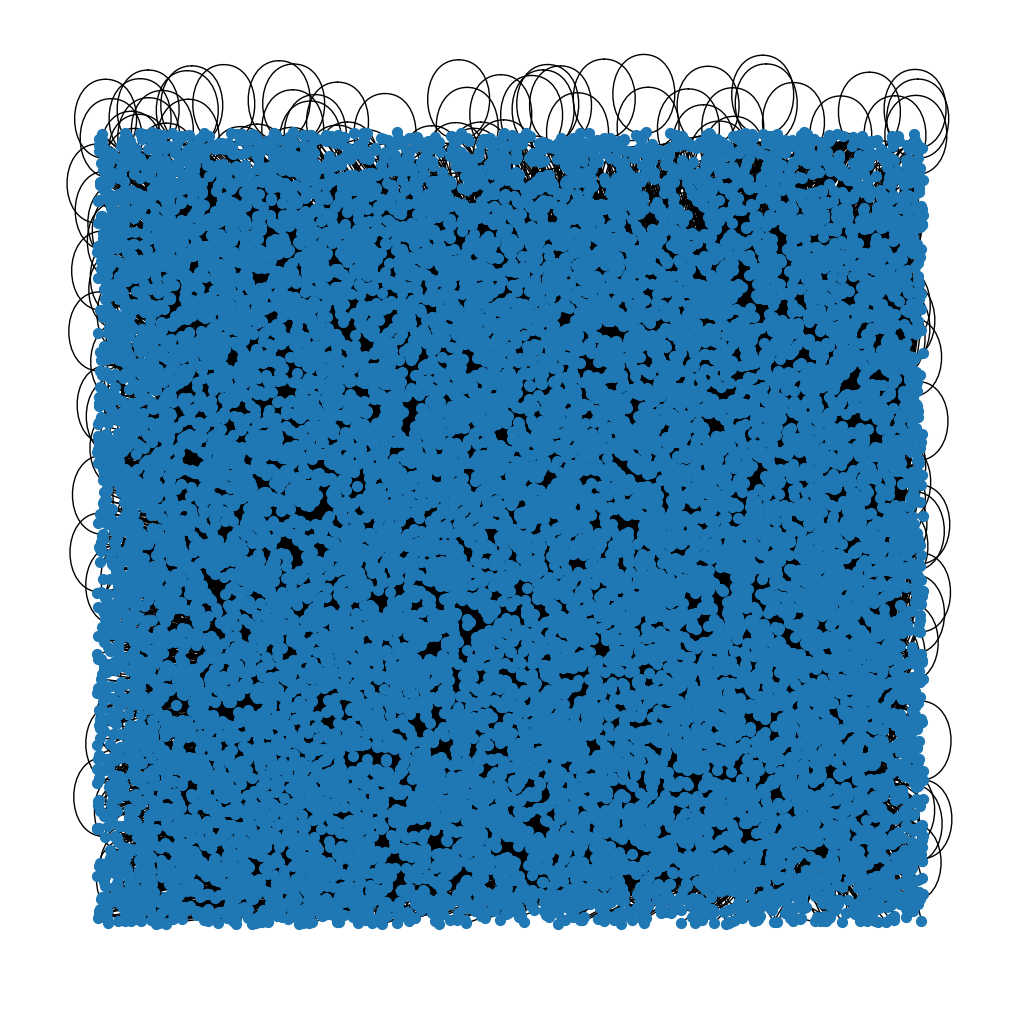

In [10]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('transactions.csv')

# Create graph
G = nx.from_pandas_edgelist(data, 'signer_account_id', 'receiver_account_id')

# Generate the layout
layout = nx.random_layout(G)

# Draw the graph
plt.figure(figsize=(10, 10))
nx.draw(G, pos=layout, with_labels=False, node_size=50)
plt.show()


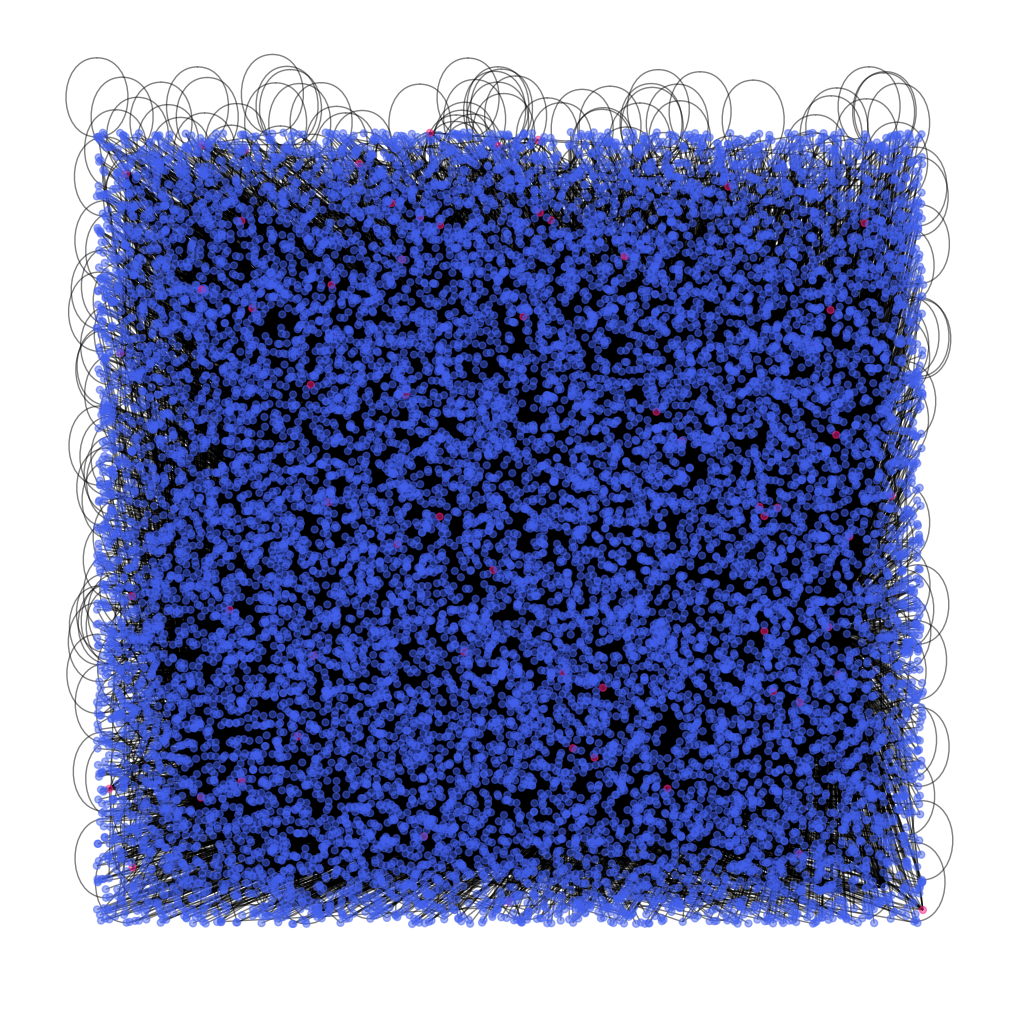

In [33]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('transactions.csv')

# Create graph
G = nx.from_pandas_edgelist(data, 'signer_account_id', 'receiver_account_id')

# Calculate transaction counts for each node
transaction_counts = data['receiver_account_id'].value_counts().to_dict()

# Assign colors based on transaction counts
node_colors = ['#4361ee' if transaction_counts.get(node, 0) < 10 else '#f72585' for node in G.nodes()]

# Generate the layout
layout = nx.random_layout(G)

# Draw the graph with translucent nodes and custom colors
plt.figure(figsize=(10, 10))
nx.draw(G, pos=layout, with_labels=False, node_size=25, node_color=node_colors, alpha=0.5)
plt.show()

Foot notes: In the above graph, each node is a wallet/contract address on NEAR protocol.

The red/pink ones highlighted in the network are ones with more than 10 transactions in the dataset. This basically just shows which addresses are more active on the network.

The next graph is based on the same concept, darker the color, more active it is on the network. Most of these are going to be smartcontracts since they are interacted the most with rather than user wallets.

To explain with an analogy... Imagine smartcontracts as Shopkeepers and wallets as people in the area. This graph basically is based on people's interactions with each other. Now obviously shopkeepers will be the ones interacting the most with people since a lot of people in the area will have business with him on a more frequent basis as compared to having business with every other person in the area.
Hence smartcontracts (the shopkeepers) will have the highest interaction with people because its their job to do so.



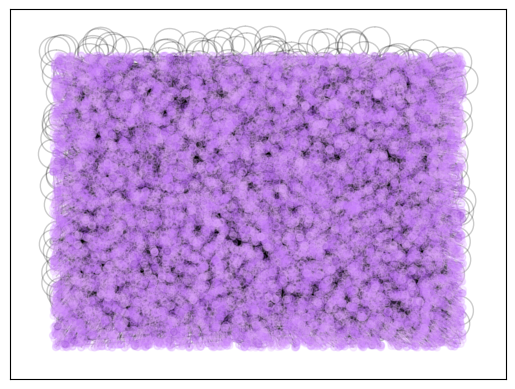

In [32]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('transactions.csv')

# Create graph
G = nx.from_pandas_edgelist(data, 'signer_account_id', 'receiver_account_id')

# Calculate transaction counts for each node
transaction_counts = data['receiver_account_id'].value_counts().to_dict()

# Assign colors based on transaction counts
node_colors = []
for node in G.nodes():
    count = transaction_counts.get(node, 0)
    if count < 1:
        color = '#e0aaff'
    elif count == 1:
        color = '#c77dff'
    elif count == 2:
        color = '#9d4edd'
    elif count == 3:
        color = '#7b2cbf'
    elif count == 4:
        color = '#5a189a'
    elif count == 5:
        color = '#3c096c'
    elif count == 6:
        color = '#240046'
    else:
        color = '#10002b'
    node_colors.append(color)

# Generate the layout
layout = nx.random_layout(G)  # Change the layout if needed

# Draw nodes with custom colors
node_options = {
    'node_color': node_colors,
    'node_size': 25,
    'alpha': 0.2
}
nx.draw_networkx_nodes(G, pos=layout, **node_options)

# Draw edges with fixed color and alpha
edge_options = {
    'edge_color': 'black',
    'alpha': 0.2,
    'width': 1
}
nx.draw_networkx_edges(G, pos=layout, **edge_options)

plt.show()
